# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Training set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# Explores Data
Below, i input some tools, dataset and did data cleaning

In [1]:
#input the dataset on Jupyter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

ds = '/Users/evelinesetiawan/Downloads/MQ BA materials/COMP6200_Data Science/portfolio-part-3-evelineps178/resources/Mobile_Price_Data.csv'
df = pd.read_csv(ds)

In [2]:
# see if there are any missing value in each columns and rows

pd.isnull(df).head()
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [3]:
# drop missing value

df_new = df.dropna()
df_new.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


# Correlation

In [30]:
# create correlation between price_range and other variables

correlation_price_range = df_new.corr()
print(correlation_price_range['price_range'].sort_values(ascending=True))

touch_screen    -0.031155
mobile_wt       -0.028663
clock_speed     -0.006926
m_dep            0.000776
n_cores          0.003573
four_g           0.014572
dual_sim         0.018153
fc               0.019327
wifi             0.020394
blue             0.020846
talk_time        0.022085
sc_h             0.023067
three_g          0.023771
pc               0.031831
sc_w             0.037330
int_memory       0.043861
px_height        0.147946
px_width         0.164763
battery_power    0.202652
ram              0.917131
price_range      1.000000
Name: price_range, dtype: float64


From the table above, we can see in sequences from the lowest value to the highest value of factors that might affect the price_range. Among those numbers, there are 4 variables that are correlating the most with the price_range that are ram, battery_power, px_width and px_height. While m_dep, n_cores and clock_speed are the variables that least likely to influence the price_range. 

Based on the table, we will testing the model using 4 strongest correlation figures : ram, battery_power, px_width and px_height.

# Split Dataset

In [5]:
# split dataset in features and target variable
feature_cols = ['ram', 'battery_power', 'px_width', 'px_height']
X = df_new[feature_cols]
y = df_new['price_range'] 

# split the dataset using training data containing 80% of the entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (1596, 4)
X_test : (399, 4)
y_train : (1596,)
y_test : (399,)


# Train a Logistic Regression Model

In [6]:
# train a logistic regression between price_range and 4 correlated variables

# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Do predictions
train_predictions = logistic_model.predict(X_train)
test_predictions = logistic_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy of Logistic Regression Model :", train_accuracy)
print("Test Accuracy of Logistic Regression Model :", test_accuracy)

Training Accuracy of Logistic Regression Model : 0.9586466165413534
Test Accuracy of Logistic Regression Model : 0.974937343358396


After doing training and test accuracy using logistic regression, the results come out around 0,9, with 0,01 points lower of training accuracy than the test accuracy. To summarize, 0,97 result of test accuracy display the model rightly predict 97% of test dataset and it applies the same with training accuracy where the model forecast 95% justly of training dataset.

Based on description above, the numbers of training and test accuracy both shows that the model perform well because the model is not overfitting the training data and is capturing underlying pattern effectively. Some factors behind the model running fit are :
- Data quality : A clean and diverse dataset that accurately represents the problem domain and includes enough instances for the model to learn patterns is crucial.
- Features selection : Choosing relevant features such as variables that has the strongest correlation with the price_range in this model, will help the analyst to analysis the model and understand 

# Train a KNN model

In [36]:
# Create and train the KNN model using the training data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on training and test data
train_knn_predictions = knn_model.predict(X_train)
test_knn_predictions = knn_model.predict(X_test)

# Calculate accuracy of each model
train_knn_accuracy = accuracy_score(y_train, train_knn_predictions)
test_knn_accuracy = accuracy_score(y_test, test_knn_predictions)

print("Training Accuracy of KNN model:", train_knn_accuracy)
print("Test Accuracy of KNN model:", test_knn_accuracy)

Training Accuracy of KNN model: 0.956140350877193
Test Accuracy of KNN model: 0.8972431077694235


In training a KNN model, we use the same variables as in logistic regression model. Nonetheless, both training and test accuracy in KNN model show contradictory results from logistic regression model. Unlike the previous opinion, the higher number of training accuracy in this model compare to test accuracy can be interpreted the model is an overfitting one, where we can address this overfitting issue by use another parameters and or increasing the value of K.

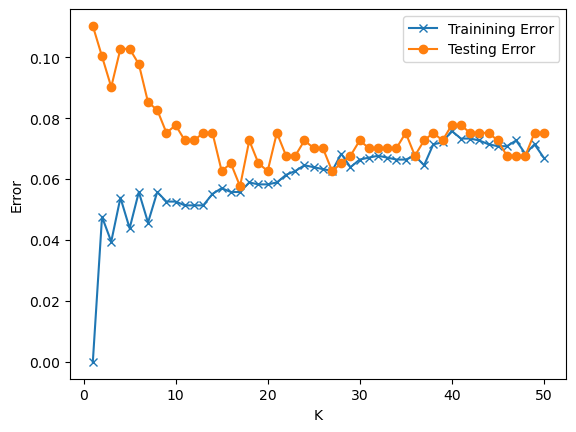

In [37]:
# Plot the accuracy trend
training_error=list()
testing_error=list()

for i in range(1, 51):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship between training and testing error
plt.plot(range(1, 51), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 51), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

The relationship between training error and test error is essential for assessing the model's performance capabilities. A low training error indicates that the model has effectively learned the patterns present in the training data. However, from the line graph above, compare to the testing error, the training error is in lower position than testing error which could indicate that the model is overfitting the training data.

# Tune the hyper-parameter K in KNN

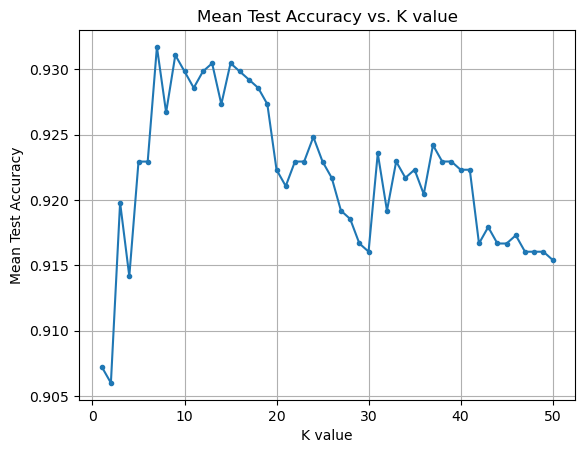

In [10]:
# Define parameter
parameter_grid = {'n_neighbors': range(1, 51)}  # Trying K from 1 to 50

# Grid search
grid_search = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Visualize results
plt.plot(range(1, 51), grid_search.cv_results_['mean_test_score'], marker=".")
plt.xlabel('K value')
plt.ylabel('Mean Test Accuracy')
plt.title('Mean Test Accuracy vs. K value')
plt.grid()
plt.show()

In [11]:
# Best K
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)
print("The accuracy:", grid_search.best_score_)

Best K: 7
The accuracy: 0.9317006269592477


After tuning hyper-parameter K in KNN, the best of KNN value are out as 7 with the accuracy of 0,93.

K value surely give impact to the prediction performance, where a small value of K can lead to high variance and overfitting, which the model is sensitive to noise in the training data. While a large value of K can lead to high bias and underfitting, where the model is too simple and fails to capture the underlying patterns in the data.